In [ ]:
pip install --upgrade transformers


In [ ]:
pip install transformers[torch]

In [ ]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 2.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
pip install transformers torch


**1. Import dataset from Google Drive**

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/My Drive/Research P1

/content/drive/My Drive/Research P1


In [3]:
import pandas as pd

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('Suicide_Detection.csv')



**2. Exploratory Data Analysis**

In [4]:
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [5]:
df['class'].value_counts()

class
suicide        116037
non-suicide    116037
Name: count, dtype: int64

In [6]:
df['class'].value_counts().index.values

array(['suicide', 'non-suicide'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


2.1 No null value found

In [8]:
df.isnull().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

2.2 Check if there is any huge imbalance between "Suicide"and "Non-suicide"

In [ ]:
import plotly.express as plx

plx.bar(df,x=df['class'].value_counts().index.values,
        y=df['class'].value_counts(),color=['Suicide','Not Suicide'])


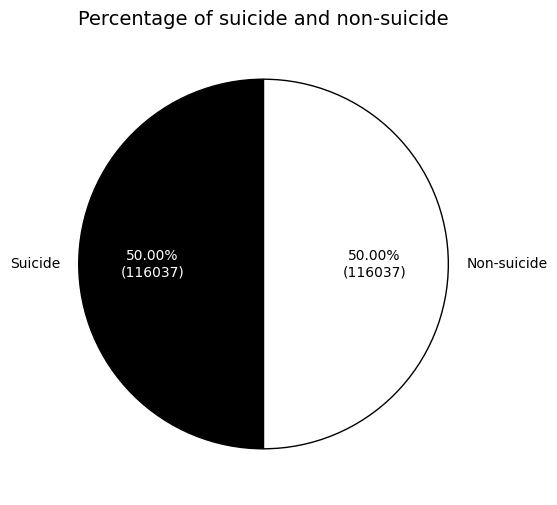

In [31]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(8, 6))
class_counts = df['class'].value_counts()

# Define the colors and labels
colors = ['#000000', '#ffffff']
labels = ['Suicide', 'Non-suicide']

# Define the wedge properties
wedgeprops = {'edgecolor': 'black', 'linewidth': 1}

# Plot the pie chart
wedges, texts, autotexts = plt.pie(class_counts, startangle=90, colors=colors,
                                   autopct=lambda p: f'{p:.2f}%\n({int(p*sum(class_counts)/100)})',
                                   labels=labels, wedgeprops=wedgeprops)

# Set the color of the inner autopct texts
for i, autotext in enumerate(autotexts):
    autotext.set_color('white' if colors[i] == '#000000' else 'black')

# Set the color of the outer labels
for i, text in enumerate(texts):
    text.set_color('black')

plt.title('Percentage of suicide and non-suicide', fontdict={'size': 14})
plt.show()

2.3 Check if there is any duplication

In [10]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Display the duplicate rows
duplicate_data = df[duplicate_rows]

print(f"Number of duplicate rows: {num_duplicates}")
print("Duplicate rows:")
print(duplicate_data)

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Unnamed: 0, text, class]
Index: []


2.4 Check word frequency for suicide

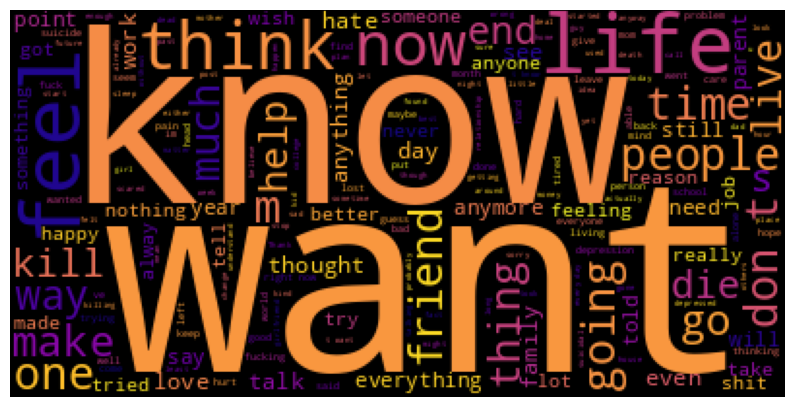

In [32]:
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

suicide=df[df['class']=='suicide']['text']
xsuicide=df[df['class']=='non-suicide']['text']

def display_cloud(data):
    plt.subplots(figsize=(10,10))
    wc = wordcloud.WordCloud(
                   background_color="black",
                   colormap='plasma',
                   max_words=1000,
                   random_state=24)
    plt.imshow(wc.generate(' '.join(data)))
    plt.axis('off')
    plt.show()

display_cloud(suicide)

2.5 Check word frequency for non-suicide

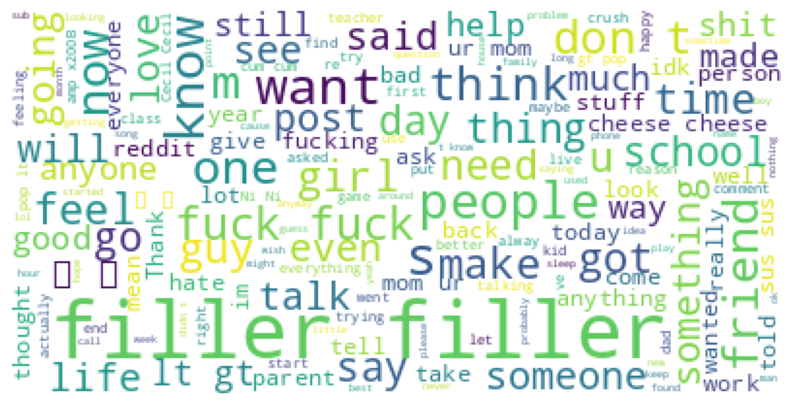

In [12]:
def display_cloud1(data):
    plt.subplots(figsize=(10,10))
    wc = wordcloud.WordCloud(
                   background_color="white",
                   max_words=1000,
                   random_state=24)
    plt.imshow(wc.generate(' '.join(data)))
    plt.axis('off')
    plt.show()

display_cloud1(xsuicide)

2.6 Check text length for suicide and non-suicide

<ipython-input-17-b922c1616107>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-17-b922c1616107>:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




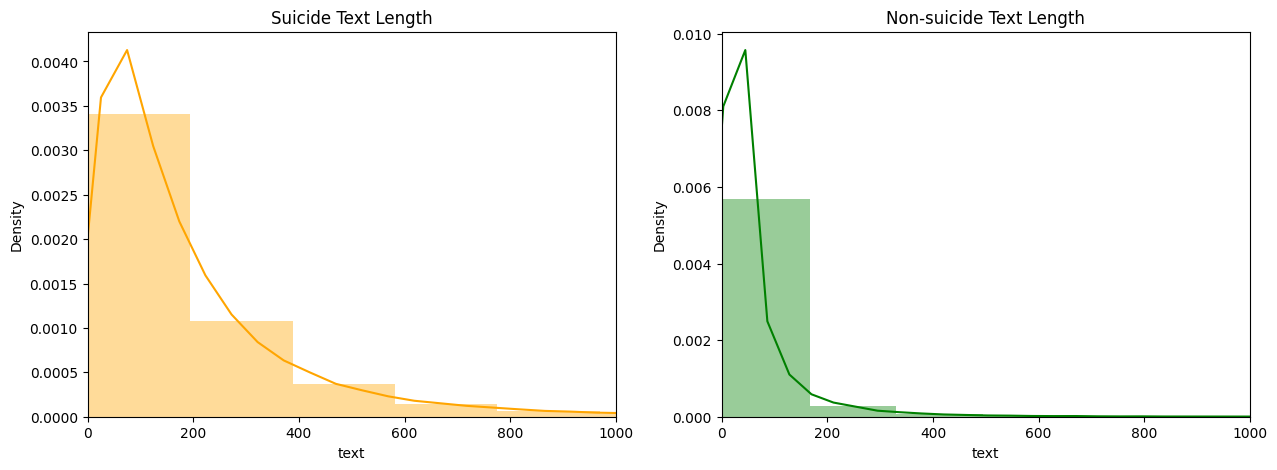

In [ ]:
import seaborn as sns
#Analyse the count of words in each segment- both positive and negative reviews
# Function for checking word length
def cal_len(data):
    return len(data)

# Create generic plotter with Seaborn
def plot_count(count_suicide, count_xsuicide, xlim_range=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.distplot(count_suicide, ax=ax1, color='Orange')
    ax1.set_title("Suicide Text Length")

    sns.distplot(count_xsuicide, ax=ax2, color='Green')
    ax2.set_title("Non-suicide Text Length")

    # Set x-axis range if specified
    if xlim_range:
        ax1.set_xlim(xlim_range)
        ax2.set_xlim(xlim_range)

    plt.show()

# Assuming you want to set the x-axis range from 0 to 1000
xlim_range = (0, 1000)

count_suicide_words = suicide.str.split().apply(lambda z: cal_len(z))
count_xsuicide_words = xsuicide.str.split().apply(lambda z: cal_len(z))

plot_count(count_suicide_words, count_xsuicide_words, xlim_range)

# Data Pre-processing

**3. Data Pre-processing**

3.1 Lowercasing

In [ ]:
# Lowercasing
df['text'] = df['text'].str.lower()
df.head(10)

,Unnamed: 0,text,class
0,2,ex wife threatening suiciderecently i left my ...,suicide
1,3,am i weird i don't get affected by compliments...,non-suicide
2,4,finally 2020 is almost over... so i can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"i’m so losthello, my name is adam (16) and i’v...",suicide
5,11,honetly idki dont know what im even doing here...,suicide
6,12,[trigger warning] excuse for self inflicted bu...,suicide
7,13,it ends tonight.i can’t do it anymore. \ni quit.,suicide
8,16,"everyone wants to be ""edgy"" and it's making me...",non-suicide
9,18,my life is over at 20 years oldhello all. i am...,suicide


3.2 Replacing ’ to '

In [ ]:
df['text'] = df['text'].str.replace("’", "'")
df.head(10)

,Unnamed: 0,text,class
0,2,ex wife threatening suiciderecently i left my ...,suicide
1,3,am i weird i don't get affected by compliments...,non-suicide
2,4,finally 2020 is almost over... so i can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"i'm so losthello, my name is adam (16) and i'v...",suicide
5,11,honetly idki dont know what im even doing here...,suicide
6,12,[trigger warning] excuse for self inflicted bu...,suicide
7,13,it ends tonight.i can't do it anymore. \ni quit.,suicide
8,16,"everyone wants to be ""edgy"" and it's making me...",non-suicide
9,18,my life is over at 20 years oldhello all. i am...,suicide


3.3 Replacing abbreviation

In [ ]:
import re

abb = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "dont": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "idk": "i do not know",
  "he'd've": "he would have",
  "he'll": "he will",  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "im": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is", "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have", "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",      "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have", "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have", "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

abb_re = re.compile('(%s)' % '|'.join(abb.keys()))

def expandContractions(text, abb_re=abb_re):
    def replace(match):
        return abb[match.group(0)]
    return abb_re.sub(replace, text)

df['text'] = df['text'].apply(expandContractions)

df.head(10)

,Unnamed: 0,text,class
0,2,ex wife threatening suiciderecently i left my ...,suicide
1,3,am i weird i do not get affected by compli ame...,non-suicide
2,4,finally 2020 is almost over... so i can never ...,non-suicide
3,8,i need helpjust help me i am crying so hard,suicide
4,9,"i am so losthello, my name is adam (16) and i ...",suicide
5,11,honetly i do not knowi do not know what i am e...,suicide
6,12,[trigger warning] excuse for self inflicted bu...,suicide
7,13,it ends tonight.i cannot do it anymore. \ni quit.,suicide
8,16,"everyone wants to be ""edgy"" and it is making m...",non-suicide
9,18,my life is over at 20 years oldhello all. i am...,suicide


# Cont here

**Continue run from here**


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import string

# Download the list of stopwords
nltk.download('stopwords')


# Function to remove stopwords, punctuation, and numbers from a piece of text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove numbers
    text = re.sub('\w*\d\w*', '', text)
    # Remove stopwords
    stop = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop)
    return text

# Apply the cleaning function to your text column
df['text'] = df['text'].apply(clean_text)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head(10)

,Unnamed: 0,text,class
0,2,ex wife threatening suiciderecently left wife ...,suicide
1,3,weird get affected compli aments coming someon...,non-suicide
2,4,finally almost never hear bad year ever swear ...,non-suicide
3,8,need helpjust help crying hard,suicide
4,9,losthello name adam struggling years afraid pa...,suicide
5,11,honetly knowi know even feel like nothing nowh...,suicide
6,12,trigger warning excuse self inflicted burnsi k...,suicide
7,13,ends tonighti cannot anymore quit,suicide
8,16,everyone wants edgy making self conscious feel...,non-suicide
9,18,life years oldhello year old balding male hair...,suicide


In [ ]:

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(text):
    word_tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(word) for word in word_tokens]
    return ' '.join(lemmas)

# Apply the function to the 'text' column
df['text'] = df['text'].apply(lemmatize_text)


In [ ]:
df.head(10)

,Unnamed: 0,text,class
0,2,ex wife threatening suiciderecently left wife ...,suicide
1,3,weird get affected compli ament coming someone...,non-suicide
2,4,finally almost never hear bad year ever swear ...,non-suicide
3,8,need helpjust help cry hard,suicide
4,9,losthello name adam struggling year afraid pas...,suicide
5,11,honetly knowi know even feel like nothing nowh...,suicide
6,12,trigger warning excuse self inflicted burnsi k...,suicide
7,13,end tonighti can not anymore quit,suicide
8,16,everyone want edgy making self conscious feel ...,non-suicide
9,18,life year oldhello year old balding male hairl...,suicide


In [ ]:
df.head()

,Unnamed: 0,text,class
0,2,ex wife threaten suiciderec left wife good che...,1
1,3,weird get affect compli ament come someon know...,0
2,4,final almost never hear bad year ever swear fu...,0
3,8,need helpjust help cri hard,1
4,9,losthello name adam struggl year afraid past y...,1


In [ ]:
import re

# Function to remove URLs from a text string
def remove_url(text):
    return re.sub(r'http\S+', '', text)

# Function to remove email addresses from a text string
def remove_mail(text):
    return re.sub(r'\S+@\S+', '', text)


# Apply the functions to the 'text' column
df['text'] = df['text'].apply(remove_url)
df['text'] = df['text'].apply(remove_mail)


In [ ]:
df.head(10)

,Unnamed: 0,text,class
0,2,ex wife threatening suiciderecently left wife ...,suicide
1,3,weird get affected compli ament coming someone...,non-suicide
2,4,finally almost never hear bad year ever swear ...,non-suicide
3,8,need helpjust help cry hard,suicide
4,9,losthello name adam struggling year afraid pas...,suicide
5,11,honetly knowi know even feel like nothing nowh...,suicide
6,12,trigger warning excuse self inflicted burnsi k...,suicide
7,13,end tonighti can not anymore quit,suicide
8,16,everyone want edgy making self conscious feel ...,non-suicide
9,18,life year oldhello year old balding male hairl...,suicide


In [ ]:
import re

def remove_emoji(text):
    # Emoji patterns
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F700-\U0001F77F"  # alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U0001FB00-\U0001FBFF"  # Symbols for Legacy Computing
        "\U0001FE00-\U0001FE0F"  # Variation Selectors
        "\U0001F004"             # Mahjong Tile Red Dragon
        "\U0001F0CF"             # Playing Card Black Joker
        "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "]+", flags=re.UNICODE)

    # Replace emojis with an empty string
    return emoji_pattern.sub(r'', text)

df['text'] = df['text'].apply(remove_emoji)


In [ ]:
df.head()

,Unnamed: 0,text,class
0,2,ex wife threatening suiciderecently left wife ...,suicide
1,3,weird get affected compli ament coming someone...,non-suicide
2,4,finally almost never hear bad year ever swear ...,non-suicide
3,8,need helpjust help cry hard,suicide
4,9,losthello name adam struggling year afraid pas...,suicide


In [ ]:
import pandas as pd

# Mapping 'Suicide' to 1 and 'Non-suicide' to 0
label_mapping = {'suicide': 1, 'non-suicide': 0}
df['class'] = df['class'].map(label_mapping)

print(df)

        Unnamed: 0                                               text  class
0                2  ex wife threatening suiciderecently left wife ...      1
1                3  weird get affected compli ament coming someone...      0
2                4  finally almost never hear bad year ever swear ...      0
3                8                        need helpjust help cry hard      1
4                9  losthello name adam struggling year afraid pas...      1
...            ...                                                ...    ...
232069      348103                    like rock going get anything go      0
232070      348106  tell many friend lonely everything deprived pr...      0
232071      348107  pee probably taste like salty tea‼️ someone dr...      0
232072      348108  usual stuff find herei posting sympathy pity k...      1
232073      348110  still beaten first bos hollow knight fought ti...      0

[232074 rows x 3 columns]


In [ ]:
preprocessed_df = df.copy()

In [ ]:
preprocessed_df.head()

,Unnamed: 0,text,class
0,2,ex wife threatening suiciderecently left wife ...,1
1,3,weird get affected compli ament coming someone...,0
2,4,finally almost never hear bad year ever swear ...,0
3,8,need helpjust help cry hard,1
4,9,losthello name adam struggling year afraid pas...,1


Data partition: 80% training, 20% test

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(preprocessed_df, test_size=0.2, random_state=42, stratify=preprocessed_df['class'])


print("Training set label distribution:\n", train_data['class'].value_counts(normalize=True))
print("\nTest set label distribution:\n", test_data['class'].value_counts(normalize=True))




Training set label distribution:
 class
1    0.500003
0    0.499997
Name: proportion, dtype: float64

Test set label distribution:
 class
0    0.500011
1    0.499989
Name: proportion, dtype: float64


In [ ]:
train_text = train_data['text'].tolist()
train_label = train_data['class'].tolist()

test_text = test_data['text'].tolist()
test_label = test_data['class'].tolist()


In [ ]:
pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 24.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from datasets import load_metric
import numpy as np

# Load the metrics
accuracy_metric = load_metric("accuracy")
precision_metric = load_metric("precision")
recall_metric = load_metric("recall")
f1_metric = load_metric("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {
        'accuracy': accuracy_metric.compute(predictions=predictions, references=labels)["accuracy"],
        'precision': precision_metric.compute(predictions=predictions, references=labels, average='binary')["precision"],
        'recall': recall_metric.compute(predictions=predictions, references=labels, average='binary')["recall"],
        'f1': f1_metric.compute(predictions=predictions, references=labels, average='binary')["f1"],
    }



<ipython-input-20-83eb5358629a>:5: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  accuracy_metric = load_metric("accuracy")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for precision contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/precision/precision.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for recall contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/recall/recall.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


# Experiment 1: Electra

1. ELECTRA

In [ ]:
from transformers import ElectraTokenizer, ElectraForSequenceClassification
from transformers import Trainer, TrainingArguments

electratokenizer = ElectraTokenizer.from_pretrained('google/electra-small-discriminator')
electramodel = ElectraForSequenceClassification.from_pretrained('google/electra-small-discriminator', num_labels=2)



Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch

class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Tokenize the texts
train_encodings = electratokenizer(train_text, truncation=True, padding=True, max_length=128)
test_encodings = electratokenizer(test_text, truncation=True, padding=True, max_length=128)

# Create torch datasets
train_dataset = Dataset(train_encodings, train_label)
test_dataset = Dataset(test_encodings, test_label)


In [ ]:
training_args_electra = TrainingArguments(
    output_dir='./results',          # output directory for model checkpoints
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
     evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)


In [ ]:
trainer_electra = Trainer(
    model=electramodel,
    args=training_args_electra,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

trainer_electra.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.065300,0.080926,0.974836,0.973041,0.976731,0.974883
2,0.009500,0.092945,0.978132,0.981974,0.974146,0.978044
3,0.010400,0.091143,0.978498,0.978168,0.978843,0.978505


TrainOutput(global_step=34812, training_loss=0.08455659269357003, metrics={'train_runtime': 1589.7752, 'train_samples_per_second': 350.35, 'train_steps_per_second': 21.897, 'total_flos': 4096515822921216.0, 'train_loss': 0.08455659269357003, 'epoch': 3.0})

In [ ]:
trainer_electra.evaluate()


{'eval_loss': 0.6999422907829285,
 'eval_accuracy': 0.4839814715070559,
 'eval_precision': 0.4747953176804926,
 'eval_recall': 0.3023786951650435,
 'eval_f1': 0.3694616295906279,
 'eval_runtime': 18.2788,
 'eval_samples_per_second': 2539.274,
 'eval_steps_per_second': 39.718,
 'epoch': 3.0}

# Experiment 2: Albert

2. ALBERT

In [ ]:
from transformers import AlbertTokenizer, AlbertForSequenceClassification
from transformers import Trainer, TrainingArguments

alberttokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
albertmodel = AlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=2)  # Adjust `num_labels` based on your task


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)



# Tokenize the whole dataset
train_encodings_alb = alberttokenizer(train_text, padding=True, truncation=True, max_length=512, return_tensors="pt")
test_encodings_alb = alberttokenizer(test_text, padding=True, truncation=True, max_length=512, return_tensors="pt")


# Create torch datasets
train_dataset_alb = CustomDataset(train_encodings_alb, train_label)
test_dataset_alb  = CustomDataset(test_encodings_alb, test_label)



In [ ]:
training_args_alb = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
     evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)

trainer_alb = Trainer(
    model=albertmodel,
    args=training_args_alb,
    train_dataset=train_dataset_alb,
    eval_dataset=test_dataset_alb,
     compute_metrics=compute_metrics,
)

trainer_alb.train()


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
<ipython-input-101-dee4029be847>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.110200,0.111638,0.968135,0.980495,0.955272,0.967719
2,0.069100,0.096917,0.973974,0.977430,0.970354,0.973879
3,0.031500,0.088939,0.975978,0.981349,0.970397,0.975842


<ipython-input-101-dee4029be847>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-101-dee4029be847>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


TrainOutput(global_step=34812, training_loss=0.11986808930929803, metrics={'train_runtime': 14197.3467, 'train_samples_per_second': 39.231, 'train_steps_per_second': 2.452, 'total_flos': 1.331069302397952e+16, 'train_loss': 0.11986808930929803, 'epoch': 3.0})

In [ ]:
trainer_alb.evaluate()

<ipython-input-49-8a8da722a71a>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.6931478977203369,
 'eval_accuracy': 0.500032317138856,
 'eval_precision': 0.0,
 'eval_recall': 0.0,
 'eval_f1': 0.0,
 'eval_runtime': 350.8622,
 'eval_samples_per_second': 132.288,
 'eval_steps_per_second': 2.069,
 'epoch': 3.0}

# Experiment 3: RoBERTa

3. RoBERTa

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import Trainer, TrainingArguments

tokenizer = RobertaTokenizer.from_pretrained('Roberta-base')
robertamodel = RobertaForSequenceClassification.from_pretrained('Roberta-base', num_labels=2)  # Adjust `num_labels` based on your task




/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at Roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

from torch.utils.data import Dataset

class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length, return_tensors="pt")
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Convert DataFrame to dataset
train_dataset_rob = TextDataset(train_text, train_label, tokenizer)
test_dataset_rob = TextDataset(test_text, test_label, tokenizer)


In [ ]:
import torch

training_args_rob = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
     evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)

trainer_rob = Trainer(
    model=robertamodel,
    args=training_args_rob,
    train_dataset=train_dataset_rob,
    eval_dataset=test_dataset_rob,
     compute_metrics=compute_metrics,
)

trainer_rob.train()


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.201000,0.172243,0.956501,0.942893,0.971862,0.957158
2,0.584100,0.903623,0.500011,0.000000,0.000000,0.000000
3,0.086400,0.097624,0.971453,0.977231,0.965398,0.971279


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=34812, training_loss=0.34555525595290576, metrics={'train_runtime': 13472.1299, 'train_samples_per_second': 41.343, 'train_steps_per_second': 2.584, 'total_flos': 1.4654680628124672e+17, 'train_loss': 0.34555525595290576, 'epoch': 3.0})

In [ ]:
trainer_rob.evaluate()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.6931528449058533,
 'eval_accuracy': 0.500032317138856,
 'eval_precision': 0.0,
 'eval_recall': 0.0,
 'eval_f1': 0.0,
 'eval_runtime': 350.7199,
 'eval_samples_per_second': 132.342,
 'eval_steps_per_second': 16.543,
 'epoch': 3.0}

In [ ]:
trainer_rob.save_model("/content/drive/My Drive/Research P1/RoBerTa")

In [ ]:
        # Saving the tokenizer
        tokenizer.save_pretrained("/content/drive/My Drive/Research P1/RoBerTa")
        print("saved tokenizer")

saved tokenizer


In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification

# Path where your model and tokenizer are saved
model_path = "/content/drive/My Drive/Research P1/RoBerTa"

# Load the model
model = RobertaForSequenceClassification.from_pretrained(model_path)

# Load the tokenizer
tokenizer = RobertaTokenizer.from_pretrained(model_path)

In [ ]:
import torch

def predict_suicide_ideation(text):
    # Encode the text using the tokenizer
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True, padding=True)

    # Move inputs to the same device as model
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    # Get model predictions
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        predictions = torch.argmax(outputs.logits, dim=1)

    # Return whether the text is classified as suicidal (1) or not suicidal (0)
    return 'Suicidal' if predictions[0].item() == 1 else 'Non-Suicidal'

In [ ]:
# Example of using the function
test_text = "I want to die"
prediction = predict_suicide_ideation(test_text)
print(f"The text is classified as: {prediction}")

The text is classified as: Suicidal


# Experiment 4: GPT-2

4. GPT-2

In [ ]:
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification
from transformers import Trainer, TrainingArguments

gpttokenizer = GPT2Tokenizer.from_pretrained('gpt2')
gptmodel = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=2)  # Assuming binary classification

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class SuicideDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

# Set tokenizer padding token
gpttokenizer.pad_token = gpttokenizer.eos_token


# Tokenize the whole dataset
train_encodings_gpt = gpttokenizer(train_text, padding=True,return_tensors="pt", truncation=True, max_length=512)
test_encodings_gpt = gpttokenizer(test_text, padding=True, return_tensors="pt",truncation=True, max_length=512)


# Create torch datasets
train_dataset_gpt = SuicideDataset(train_encodings_gpt, train_label)
test_dataset_gpt = SuicideDataset(test_encodings_gpt,test_label)

In [ ]:
# Ensure the model's embedding size matches the tokenizer
gptmodel.config.pad_token_id = gpttokenizer.pad_token_id

training_args_gpt = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
     evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)

trainer_gpt = Trainer(
    model=gptmodel,
    args=training_args_gpt,
    train_dataset=train_dataset_gpt,
     eval_dataset=test_dataset_gpt,
     compute_metrics=compute_metrics,
)

trainer_gpt.train()

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
<ipython-input-109-be2dcfb4f7e3>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.079800,0.075789,0.976128,0.979891,0.972207,0.976034
2,0.009100,0.085060,0.977292,0.978529,0.975999,0.977262
3,0.018600,0.096023,0.978326,0.978243,0.978412,0.978327


<ipython-input-109-be2dcfb4f7e3>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-109-be2dcfb4f7e3>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


TrainOutput(global_step=34812, training_loss=0.0786212772755727, metrics={'train_runtime': 14850.9257, 'train_samples_per_second': 37.505, 'train_steps_per_second': 2.344, 'total_flos': 1.455362802544804e+17, 'train_loss': 0.0786212772755727, 'epoch': 3.0})

In [ ]:
trainer_gpt.evaluate()

<ipython-input-37-94a3cdedf856>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'eval_loss': 0.6947669982910156,
 'eval_accuracy': 0.5249165140579554,
 'eval_precision': 0.5302023952722138,
 'eval_recall': 0.4368697750581746,
 'eval_f1': 0.4790322961702932,
 'eval_runtime': 393.5167,
 'eval_samples_per_second': 117.949,
 'eval_steps_per_second': 14.744,
 'epoch': 3.0}